# Neural Networks

In this exercise we will look at Neural Networks with [scikit-learn's MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) and [PyTorch](https://pytorch.org) .

## MLPClassifier
This classifier can be used like any other estimator in scikit-learn.
It implements a multi-layer perceptron.

In the image below, we have one hidden layer in the middle with k neurons.
The leftmost layer (input layer) consists of neurons representing the input features. This number needs to be equal to the input features. In scikit learn you do not have to define this.
The values from the previous layer are transformed with a weighted linear summation followed by a non-linear activation function.
You can access the weights with `cls.coefs_`. The attribute `intercepts_` represent the list of bias vectors.

<div>
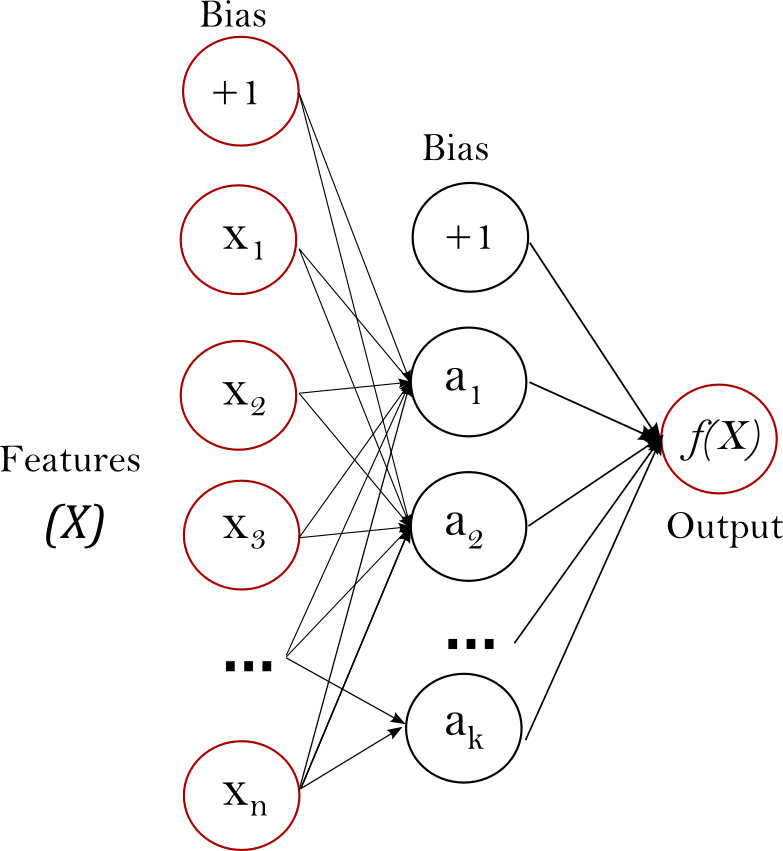
</div>

<sup>https://scikit-learn.org/stable/modules/neural_networks_supervised.html</sup>

## MLPClassifier
Advantages:
- can learn non-linear models
- learn models in real-time (on-line learning) with `partial_fit`

Disadvantages :
- the non-convex loss function has more than one local minimum
  - different random weight initializations can lead to different validation measures
- sensitive to feature scaling
- requires tuning number of hidden neurons, layers, and iterations etc.

To see it in action we load the `Adult` data first (see previous exercise)

In [1]:
import pandas as pd
import numpy as np
from scipy.io import arff
from sklearn.preprocessing import LabelEncoder

adult_arff_data, adult_arff_meta = arff.loadarff(open('adult.arff', 'r'))
adult = pd.DataFrame(adult_arff_data)
adult = adult.applymap(lambda x: x.decode('utf8').replace("'", "") if hasattr(x, 'decode') else x)

adult_target = adult['class']
label_encoder = LabelEncoder()
adult_target = label_encoder.fit_transform(adult_target)
adult_data = adult.drop('class', axis=1)
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25.0,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States
1,38.0,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States
2,28.0,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States
3,44.0,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States
4,18.0,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States


## Preprocessing 
The preprocessing is copied from the last exercise where we used the `StandardScaler` for the numeric features and `OneHotEncoder` for categorical features.

In [2]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_features)])


### Data splitting

Due to the fact that we have enough data available, we usually want to do a train, validation and test spit.

We used the data in 
- `train` for training the classifier
- `validation` to try different hyperparameters during training and analyze the evaluation meaures on this `validation` set
  - thus we decide which model we choose based on the `train`and `validation`set
- `test` only used at the very end (e.g. end of the project) to see how well the model performs on unseen data

The [`MLPClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) splits the validation set on it own when using `early_stopping=True`. You can also change the `validation_fraction`.
To see the measure on the validation split, also set `verbose` to `True`.

Of course you can also do the validation split on your own.

<div>
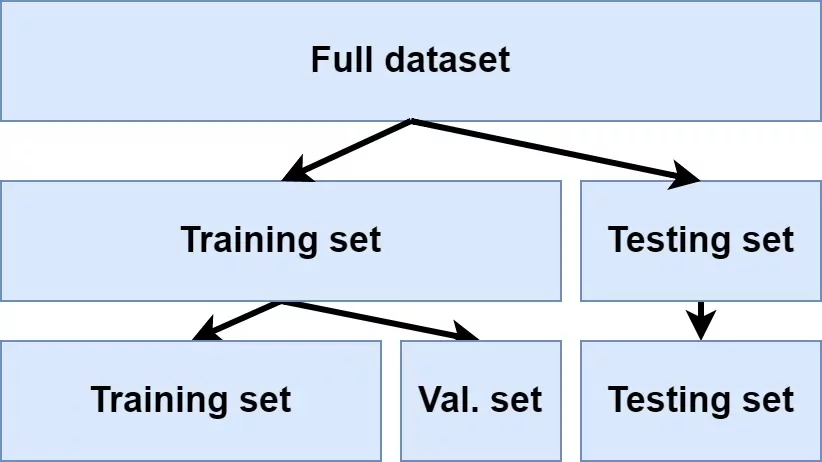
</div>

In [3]:
from sklearn.model_selection import train_test_split

feature_train, feature_test, target_train, target_test = \
    train_test_split(adult_data, adult_target, random_state=1234, stratify=adult_target, test_size = 5000)

- The early stoppping feature will analyze the validation accuracy and will terminate training when validation score is not improving by at least `tol` (parameter) for `n_iter_no_change` (parameter) consecutive epochs.

## Clarify terms
- Epoch vs Steps
  - the training data is feed to the network in so called `steps`
    - each step contains a specified number of examples ( `batch_size` )
    - one step means one gradient update
  - an epoch is over when all training data is seen once
    - this means: when two epochs are executed, then you have seen the whole training data twice
- Learning rate
  - a hyperparameter which controls how much to change the model weights in response to the estimated error
  
Now let's initialize our `MLPClassifier`.

In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline

clf = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu',
                    learning_rate_init=1e-3, batch_size=128, verbose=True,
                    early_stopping=True, random_state=1234)

pipeline = Pipeline([ ('preprocessing', preprocessor), ('estimator', clf) ])

pipeline.fit(feature_train, target_train);

Iteration 1, loss = 0.33580169
Validation score: 0.856556
Iteration 2, loss = 0.30899614
Validation score: 0.858609
Iteration 3, loss = 0.30466061
Validation score: 0.857013
Iteration 4, loss = 0.30108714
Validation score: 0.857241
Iteration 5, loss = 0.29809869
Validation score: 0.855416
Iteration 6, loss = 0.29547177
Validation score: 0.857241
Iteration 7, loss = 0.29315558
Validation score: 0.855872
Iteration 8, loss = 0.29008417
Validation score: 0.858609
Iteration 9, loss = 0.28755599
Validation score: 0.856784
Iteration 10, loss = 0.28563485
Validation score: 0.857241
Iteration 11, loss = 0.28325495
Validation score: 0.860205
Iteration 12, loss = 0.28101038
Validation score: 0.859065
Iteration 13, loss = 0.27829327
Validation score: 0.856784
Iteration 14, loss = 0.27604420
Validation score: 0.857013
Iteration 15, loss = 0.27409972
Validation score: 0.859293
Iteration 16, loss = 0.27185319
Validation score: 0.856328
Iteration 17, loss = 0.27068030
Validation score: 0.860661
Iterat

## Important
You can play around with the hyper parameters before this cell.
Execute the following cell only with you are fine with the previous results on the validation set.

In [5]:
from sklearn.metrics import classification_report
prediction = pipeline.predict(feature_test)
print(classification_report(target_test, prediction))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91      3804
           1       0.71      0.67      0.69      1196

    accuracy                           0.85      5000
   macro avg       0.80      0.79      0.80      5000
weighted avg       0.85      0.85      0.85      5000



## Introduction to Pytorch

[PyTorch](https://pytorch.org) is an open source machine learning library used for applications such as computer vision, primarily developed by Facebook's AI Research lab (FAIR).

It allows to make use of accelerators like GPUs which are optimized for fast vector and matrix operations on multi-dimensional arrays ([Tensors](https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html)) resulting in a considerable speedup compared to CPU calculations. This allows for processing large datasets through deep neural networks in reasonable time.

Training of deep neural networks in Pytorch is based on the backpropagation algorithm and iterative optimization using gradient descent over multiple epochs. As you learned in the lecture, for this we need to backpropagate gradients and update parameters using the chain rule.

Fortunately, Pytorch can handle this process for us and constructs the corresponding [computational graph](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html) and derivatives automatically. All we have to is design the network and specify the forward pass through the network.

It is one representative of the libraries used for deep learning (others are e.g. [Tensorflow](https://www.tensorflow.org)).
The basis of all computations are `tensors` ( generalizations of a matrix that can be indexed in more than two dimensions ).

But first install the package if not yet available with the cell below.
If you have GPUs available, then you should use the installation command shown at the [PyTorch installation page](https://pytorch.org/get-started/locally/).

In [6]:
%pip install -q -U torch torchvision torchaudio

Let's create a tensor:

In [7]:
import torch

my_first_tensor = torch.tensor([1., 2., 3.]) # create from a python list
display(my_first_tensor)

a_matrix_tensor = torch.tensor(
    [[1., 2., 3.], 
     [4., 5., 6]]
)
display(a_matrix_tensor)

a_3d_tensor = torch.tensor(
    [[[1., 2.], [3., 4.]],
    [[5., 6.], [7., 8.]]]
)
display(a_3d_tensor)

tensor([1., 2., 3.])

tensor([[1., 2., 3.],
        [4., 5., 6.]])

tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]]])

## Indexing
- indexing works the same as in normal python

In [28]:
display(my_first_tensor[0])
display(a_matrix_tensor[0])
display(a_matrix_tensor[0,1])

tensor(1.)

tensor([1., 2., 3.])

tensor(2.)

- to get a python scalar from a tensor representation of a number, call `.item`

In [9]:
display(my_first_tensor[0].item())

1.0

## Compuation Graphs
- PyTorch uses the concept of a computation graph
   - it represents how data flows through the net (specification of how your data is combined to give you the output)
   - you do not need to calculate the back propagation gradients yourself
   - it can be debugged because you can set breakpoints in between the layers

- usually if you do a computation like `3+4` the result `7` contains only the number but not the information how it was generated
   - when you initialize tensors with `requires_grad=True` the resulting tensor will also know how it is generated (to allow for back propagation)

In [10]:
x = torch.tensor([1., 2., 3], requires_grad=True)
y = torch.tensor([4., 5., 6], requires_grad=True)

z = x + y
display(z)

# BUT z knows something extra.
display(z.grad_fn)

tensor([5., 7., 9.], grad_fn=<AddBackward0>)

- What is the derivative of this sum with respect to the first component of x
- PyTorch can compute this gradient based on the additional information

In [11]:
s = z.sum()
display(s)

s.backward() # calling .backward() on any tensor will run backprop
display(x.grad)

tensor(21., grad_fn=<SumBackward0>)

tensor([1., 1., 1.])

In [12]:
s = z.sum()
display(s)
display(s.grad_fn)

tensor(21., grad_fn=<SumBackward0>)

## Convert Pandas Dataframe to PyTorch Datasets
Now we have to convert our datasets to Pytorch [Tensors](https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html). For this we first cast the numpy arrays to tensors and subsequently register them as TensorDatasets, which are part of Pytorch and offer methods for querying the data by index.

We further prepare DataLoaders for our datasets. These objects automatically handle the batching of examples in our datasets for us and give us an easy way to iterate over the mini-batches.

More information about handling data in Pytorch can be found [here](https://pytorch.org/docs/stable/data.html).

Due to the fact that PyTorch does not split the validation set internally, we need to split it ourselves.

In [13]:
# due to the fact that we override the feature_train and target_train variable execute this cell only once
# or reun the cell with the first train_test_split again to initialize both variables again
feature_train, feature_validation, target_train, target_validation = \
    train_test_split(feature_train, target_train, random_state=1234, stratify=target_train, test_size = 5000)

In [14]:
# Now we have to preprocess the data ourselves because we do not use the pipeline
feature_train_processed = preprocessor.fit_transform(feature_train)
# important: we only call fit_transform for train and transform for test and validation
feature_validation_processed = preprocessor.transform(feature_validation)
feature_test_processed = preprocessor.transform(feature_test)

In [15]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

# convert data to tensors and create datasets
train_dataset = TensorDataset(torch.FloatTensor(feature_train_processed), torch.FloatTensor(target_train))
validation_dataset = TensorDataset(torch.FloatTensor(feature_validation_processed), torch.FloatTensor(target_validation))
test_dataset = TensorDataset(torch.FloatTensor(feature_test_processed), torch.FloatTensor(target_test))

# create dataloaders which will handle the batching
train_loader = DataLoader(dataset=train_dataset, batch_size=128, shuffle=True)
validation_loader = DataLoader(dataset=validation_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=128, shuffle=True)

## Define the network architecture

First we need to define the layers of our network.
The `torch.nn` namespace provides all the building blocks for it. 

A neural network is a module itself that consists of other modules (layers). This nested structure allows for building and managing complex architectures easily.

We define our neural network by subclassing `nn.Module`:

In [16]:
import torch.nn as nn
from torch.nn import functional as F

num_features = feature_train_processed.shape[1]

# We define our model
class Net(nn.Module):
    
    # define the available layers in the init method
    # this is our model architecture: 2 hidden layers with 100 neurons and 1 output layer
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(num_features, 100)
        self.fc2 = nn.Linear(100, 50)
        self.fc3 = nn.Linear(50, 1)
        
    # define the actual forward pass through the layers
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# instantiate the model
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=107, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=1, bias=True)
)


## Run the training

First we define our loss function and optimizer. Since we are looking at a binary classification problem, it makes sense to use binary cross-entropy loss. For the optimizer choosing Adam is a good default choice.

In [17]:
# choose loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)

Then we setup our training and validation loop using the convenience of the DataLoaders. Model selection is done based on validation accuracy over all epochs.

In [18]:
from sklearn.metrics import accuracy_score

n_epochs = 50
n_batches_train = len(train_loader)
n_batches_val = len(validation_loader)

losses = []
losses_val = []

accuracies = []
accuracies_val = []

acc_val_max = 0

# iterate over epochs
for epoch in range(n_epochs):
    
    outputs_train = np.array([])
    outputs_val = np.array([])
    
    targets_train = np.array([])
    targets_val = np.array([])
    
    epoch_loss_train = 0
    epoch_loss_val = 0
    
    # set model to training mode, so gradients will be tracked for backpropagation
    model.train()
    
    # iterate over all batches in the training set
    for x_train, y_train in train_loader:
        
        output = model(x_train)
        
        loss = criterion(output,y_train.unsqueeze(-1))
        # backpropagate loss
        loss.backward()
        
        optimizer.step()
        optimizer.zero_grad()
        
        epoch_loss_train += loss.item()
        
        output = torch.sigmoid(output).squeeze()
        outputs_train = np.append(outputs_train, output.detach().numpy())
        targets_train = np.append(targets_train, y_train.detach().numpy())
    
    # training for this epoch is over, now put the model into eval mode
    # for validation we do not want to track gradients here
    model.eval()
    
    with torch.no_grad():
        # iterate over all batches in the validation set
        for x_val, y_val in validation_loader:
            
            output_val = model(x_val)
            
            loss_val = criterion(output_val, y_val.unsqueeze(-1))
            
            epoch_loss_val += loss_val
            
            output_val = torch.sigmoid(output_val).squeeze()
            outputs_val = np.append(outputs_val, output_val.numpy())
            targets_val = np.append(targets_val, y_val.detach().numpy())
    
    # validation loop is done, calculate statistics for this epoch
    epoch_loss_train = epoch_loss_train / n_batches_train
    epoch_loss_val = epoch_loss_val / n_batches_val
    
    losses.append(epoch_loss_train)
    losses_val.append(epoch_loss_val)
    
    # assign label 1 if sigmoid(output) >= 0.5, 0 otherwise
    predictions_train = outputs_train
    predictions_train[predictions_train>=0.5] = 1
    predictions_train[predictions_train<0.5] = 0

    accuracies.append(accuracy_score(targets_train, predictions_train))
    
    predictions_val = outputs_val
    predictions_val[predictions_val>=0.5] = 1
    predictions_val[predictions_val<0.5] = 0
    
    accuracies_val.append(accuracy_score(targets_val, predictions_val))
    
    print(f'Epoch: ({epoch+1}/{n_epochs}), loss: {epoch_loss_train:.4f}, loss_val: {epoch_loss_val:.4f}')
    
    # check if validation accuracy improved in this epoch, if yes save model checkpoint
    if accuracies_val[-1] > acc_val_max:
        print(f"Validation accuracy increased ({acc_val_max:.4f} ===> {accuracies_val[-1]:.4f}). Saving the model...")
        acc_val_max = accuracies_val[-1]
        torch.save(model.state_dict(), "model.pt")

Epoch: (1/50), loss: 0.3559, loss_val: 0.3064
Validation accuracy increased (0.0000 ===> 0.8592). Saving the model...
Epoch: (2/50), loss: 0.3105, loss_val: 0.3013
Validation accuracy increased (0.8592 ===> 0.8608). Saving the model...
Epoch: (3/50), loss: 0.3068, loss_val: 0.3000
Validation accuracy increased (0.8608 ===> 0.8614). Saving the model...
Epoch: (4/50), loss: 0.3045, loss_val: 0.2965
Validation accuracy increased (0.8614 ===> 0.8646). Saving the model...
Epoch: (5/50), loss: 0.3027, loss_val: 0.2936
Validation accuracy increased (0.8646 ===> 0.8656). Saving the model...
Epoch: (6/50), loss: 0.3002, loss_val: 0.2989
Epoch: (7/50), loss: 0.2985, loss_val: 0.2950
Epoch: (8/50), loss: 0.2967, loss_val: 0.3034
Epoch: (9/50), loss: 0.2944, loss_val: 0.2918
Epoch: (10/50), loss: 0.2936, loss_val: 0.2996
Epoch: (11/50), loss: 0.2916, loss_val: 0.2953
Validation accuracy increased (0.8656 ===> 0.8684). Saving the model...
Epoch: (12/50), loss: 0.2901, loss_val: 0.2985
Epoch: (13/50

Using the statistics we tracked over the training, we can also plot the loss and accuracy over all training epochs:

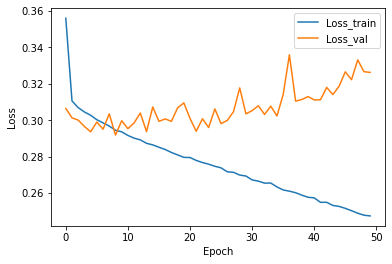

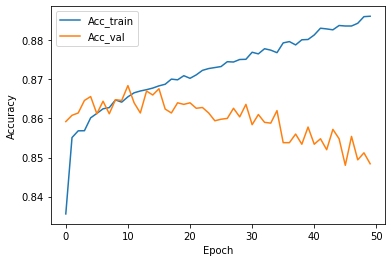

In [19]:
import matplotlib.pyplot as plt 

plt.plot(range(n_epochs), losses)
plt.plot(range(n_epochs), losses_val)

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend(['Loss_train', 'Loss_val'])

plt.show()

plt.plot(range(n_epochs), accuracies)
plt.plot(range(n_epochs), accuracies_val)

plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend(['Acc_train', 'Acc_val'])

plt.show()

Finally, to predict, we need to run the samples from our test set through our model, similar to validation.

But first we load the parameters of our best model from training, i.e. the one with the highest validation accuracy

In [20]:
from sklearn.metrics import classification_report

# load the best model from training
model.load_state_dict(torch.load("model.pt"))

outputs_test = np.array([])
targets_test = np.array([])

model.eval()

with torch.no_grad():
    for x_test, y_test in test_loader:

        output_test = model(x_test)
        output_test = torch.sigmoid(output_test).squeeze()
        
        outputs_test = np.append(outputs_test, output_test.numpy())
        targets_test = np.append(targets_test, y_test.detach().numpy())

predictions = outputs_test
predictions[predictions>=0.5] = 1
predictions[predictions<0.5] = 0

print(classification_report(targets_test, predictions))

              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91      3804
         1.0       0.74      0.65      0.69      1196

    accuracy                           0.86      5000
   macro avg       0.82      0.79      0.80      5000
weighted avg       0.86      0.86      0.86      5000



## PyTorch Lightning

[PyTorch Lightning](https://www.pytorchlightning.ai) is an open-source Python library that provides a high-level interface for PyTorch.

It reduces all the boilerplate code which you need to define in vanilla PyTorch.

This is similar to [Tensorflow](https://www.tensorflow.org) (which provides the basis) and [Keras](https://keras.io) (which is the high level interface).

First install the package:

In [21]:
%pip install -q -U pytorch-lightning

Note: you may need to restart the kernel to use updated packages.


## Lightning Introduction

- Keep all the flexibility (this is all pure PyTorch), but removes a ton of boilerplate
- More readable by decoupling the research code from the engineering
- Easier to reproduce
- Less error-prone by automating most of the training loop and tricky engineering
- Scalable to any hardware without changing your model

<sup>https://pytorch-lightning.readthedocs.io/en/stable/starter/new-project.html#</sup>

Now we can define the LightningModule by subclassing `LightningModule`

In [22]:
import pytorch_lightning as pl
import torch.nn as nn
from torch.nn import functional as F
import torchmetrics

class LightningModel(pl.LightningModule):
    
    def __init__(self):
        super().__init__()
        self.my_model = nn.Sequential(
            nn.Linear(107, 100),
            nn.ReLU(),
            nn.Linear(100, 50),
            nn.ReLU(),
            nn.Linear(50, 1)
        )
        self.train_acc = torchmetrics.Accuracy()
        self.valid_acc = torchmetrics.Accuracy()
        self.test_acc = torchmetrics.Accuracy()

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        logits = self.my_model(x)
        return logits

    
    def training_step(self, batch, batch_idx):
        """
        The training_step function which is defined the train loop.
        It is independent of forward.
        """
        x, y = batch
        logits = self.forward(x)
        loss = F.binary_cross_entropy_with_logits(logits, y.unsqueeze(-1))

        predictions = torch.sigmoid(logits).squeeze()
        self.train_acc(predictions, y.int())

        # the training_step has to return at least a key named 'loss'
        return {'loss' : loss}
    
    def training_epoch_end(self, training_step_outputs):
        """
        This function is called at the end of each training epoch.
        All results from the training step function is contained in training_step_outputs.
        """
        avg_train_loss = torch.stack([x['loss'] for x in training_step_outputs]).mean()
        avg_train_acc = self.train_acc.compute() 
        
        self.log("loss/train", avg_train_loss)
        self.log("acc/train", avg_train_acc)
        
        # https://github.com/PyTorchLightning/pytorch-lightning/issues/2563#issuecomment-656506419
        self.logger.experiment.add_scalars("loss/combined", {"train_loss": avg_train_loss}, self.current_epoch)
        self.logger.experiment.add_scalars("acc/combined", {"train_acc": avg_train_acc}, self.current_epoch)
        
    def validation_step(self, batch, batch_idx):
        x, y = batch
        logits = self.forward(x)
        loss = F.binary_cross_entropy_with_logits(logits, y.unsqueeze(-1)) 
        
        predictions = torch.sigmoid(logits).squeeze()
        self.valid_acc(predictions, y.int())
        return {'val_loss' : loss} 
    
    def validation_epoch_end(self, validation_step_outputs):
        avg_val_loss = torch.stack([x['val_loss'] for x in validation_step_outputs]).mean()
        avg_val_acc = self.valid_acc.compute()
        
        # need to log the validation accuracy, to be used as criterion for model selection
        # https://pytorch-lightning.readthedocs.io/en/stable/common/weights_loading.html
        self.log("loss/validation", avg_val_loss)
        self.log("acc/validation", avg_val_acc)
        
        self.logger.experiment.add_scalars("loss/combined", {"val_loss": avg_val_loss}, self.current_epoch)
        self.logger.experiment.add_scalars("acc/combined", {"val_acc": avg_val_acc}, self.current_epoch)


    def test_step(self, batch, batch_idx):
        x, y = batch
        logits = self.forward(x)
        loss = F.binary_cross_entropy_with_logits(logits, y.unsqueeze(-1))         
        predictions = torch.sigmoid(logits).squeeze()

        test_acc_batch = self.test_acc(predictions, y.int())
        return test_acc_batch
    
    def test_epoch_end(self, test_step_outputs):
        avg_test_acc = self.test_acc.compute()        
        self.log('acc/test', avg_test_acc)        
        return avg_test_acc
    
    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-3, weight_decay=1e-4)
        return optimizer


## Tensorboard

[Tensorboard](https://www.tensorflow.org/tensorboard) is the visualization toolkit of TensorFlow but it is also used by PyTorch and many other deepl learning libraries.

It visualizes the data stored in folders. PyTorch provides `loggers` to write the data in the expected format.

Tensorboard is automatically installed with PyTorch Lightning.

In [23]:
%load_ext tensorboard
%tensorboard --logdir lightning_logs/
# if "Launching TensorBoard..."" is shown for a long time, then just execute this cell again

Reusing TensorBoard on port 6006 (pid 7524), started 1:17:23 ago. (Use '!kill 7524' to kill it.)

## Lightning: Use the trainer 

Under the hood, the Lightning Trainer handles the training loop details for you e.g.

- Automatically enabling/disabling grads
- Running the training, validation and test dataloaders
- Calling the Callbacks at the appropriate times
- Putting batches and computations on the correct devices

<sup>https://pytorch-lightning.readthedocs.io/en/latest/common/trainer.html</sup>

In [24]:
from pytorch_lightning.callbacks import ModelCheckpoint

print("Your pytorch version is: " + torch.__version__)
print("Your lightning version is: " + pl.__version__)

# set a seed for all libraries such as random, numpy random etc
pl.seed_everything(42, workers=True)
model = LightningModel()

checkpoint_callback = ModelCheckpoint(dirpath='./checkpoints', monitor="acc/validation")
trainer = pl.Trainer(deterministic=True, 
                     max_epochs=25,
                     callbacks=[checkpoint_callback])

trainer.fit(model, train_loader, validation_loader)

Global seed set to 42
C:\tools\Anaconda3\envs\dm1\lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:446: UserWarning: Checkpoint directory ./checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")
GPU available: True, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
C:\tools\Anaconda3\envs\dm1\lib\site-packages\pytorch_lightning\trainer\trainer.py:1303: UserWarning: GPU available but not used. Set the gpus flag in your trainer `Trainer(gpus=1)` or script `--gpus=1`.
  rank_zero_warn(

  | Name      | Type       | Params
-----------------------------------------
0 | my_model  | Sequential | 15.9 K
1 | train_acc | Accuracy   | 0     
2 | valid_acc | Accuracy   | 0     
3 | test_acc  | Accuracy   | 0     
-----------------------------------------
15.9 K    Trainable params
0         Non-trainable params
15.9 K    Total params
0.064     Total estimated model params size (MB)


Your pytorch version is: 1.9.1
Your lightning version is: 1.4.9


Validation sanity check: 0it [00:00, ?it/s]

C:\tools\Anaconda3\envs\dm1\lib\site-packages\pytorch_lightning\trainer\data_loading.py:376: UserWarning: Your val_dataloader has `shuffle=True`, it is best practice to turn this off for val/test/predict dataloaders.
  rank_zero_warn(
C:\tools\Anaconda3\envs\dm1\lib\site-packages\pytorch_lightning\trainer\data_loading.py:105: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
Global seed set to 42
C:\tools\Anaconda3\envs\dm1\lib\site-packages\pytorch_lightning\trainer\data_loading.py:105: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero

Training: -1it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

In [25]:
# to kill the tensorboard which is running in the background, you can use the following command:
# windows:
#!taskkill /pid  {PID which is shown when tensorbaord is started}
# linux/mac:
#!kill {PID which is shown when tensorbaord is started}

In [26]:
# in case "Reusing TensorBoard on port" is printed but no tensorboard is actually running,
# you can run the following command to delete the tensorboard-info folder
# windows:
#!rmdir /s /q "%TMP%/.tensorboard-info"
# linux/mac:
#rm -rf tmpdir="${TMPDIR:-/tmp}" && rm -rf $tmpdir/.tensorboard-info

## Run the test
If you are satisfied with the results on the validation set, run your final model on the test set.

With the parameter `ckpt_path` set to `best` it will selected the best model found during training/validation.

In [27]:
trainer.test(model, test_loader, ckpt_path='best')

C:\tools\Anaconda3\envs\dm1\lib\site-packages\pytorch_lightning\trainer\data_loading.py:376: UserWarning: Your test_dataloader has `shuffle=True`, it is best practice to turn this off for val/test/predict dataloaders.
  rank_zero_warn(
C:\tools\Anaconda3\envs\dm1\lib\site-packages\pytorch_lightning\trainer\data_loading.py:105: UserWarning: The dataloader, test dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'acc/test': 0.8583999872207642, 'loss/test': 0.30819937586784363}
--------------------------------------------------------------------------------


[{'acc/test': 0.8583999872207642, 'loss/test': 0.30819937586784363}]